#error occurs when you use companies.get_symbols() because there it returns more symbols than daily limit of accessing data.
#From alphavantage: "🎓 Academic access: if you are from a college or university and would like to use our data for academic purposes (e.g., research, teaching, hackathon / campus events, etc), please reach out to support@alphavantage.co for academic data access."

In [5]:
import requests
import bs4 as bs
import lxml

#return: a list of S&P500 company symbols in alphabetical order
def get_symbols():
    resp = requests.get('http://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
    soup = bs.BeautifulSoup(resp.text, 'lxml')
    table = soup.find('table', {'class': 'wikitable sortable'})

    tickers = []

    for row in table.findAll('tr')[1:]:
        ticker = row.findAll('td')[0].text
        tickers.append(ticker)

    tickers = [s.replace('\n', '') for s in tickers]

    return tickers

In [3]:
#param: a company symbol
#return: a dictionary of stock price data of given company
def generate_daily(company):

    url = 'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol={}&outputsize=compact&apikey=1QPXCY5WU9WFE7N6'.format(company)
    r = requests.get(url)
    data = r.json()

    return data

In [2]:
# what is categories supposed to do?
# trying to turn return a dictionary with the key as the date and the value as an array of 5 indices (open, high, low, close, volume)
def generate_daily_augmented(stocks, categories):
    cats = {}
    for i in stocks['Time Series (Daily)']:
        for cat in categories:
            cats[i] = cats.get(i, "") + " " + stocks['Time Series (Daily)'][i][cat] 
        cats[i] = cats[i].split()
        
         
    return cats

In [4]:
# Create a list with company names and empty data.
## Write scripts to load data from Alphavantage to Pandas Dataframe
import numpy as np
import pandas as pd
import requests
from matplotlib import pyplot as plt
import json

company_data = {}

# companies is supposed to be a list of symbols of companies but im not too sure whether to physically create the list of 500 symbols or a way to access it from the API.
# companies = get_symbols()
companies = ["IBM"]

categories = ["1. open", "2. high", "3. low", "4. close", "5. volume"]

for company in companies:

    company_data[company] = generate_daily_augmented(generate_daily(company), categories)
    

<Axes: >

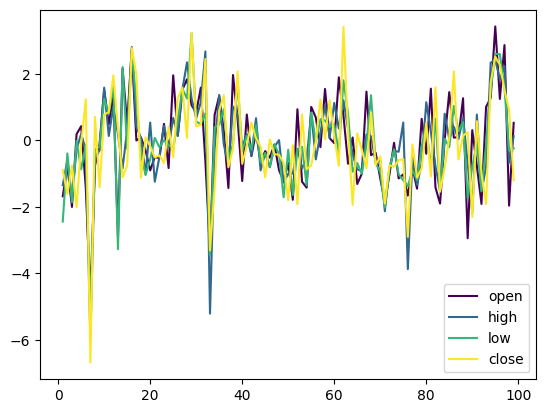

In [5]:
from matplotlib import pyplot as plt
import numpy as np
dict = company_data["IBM"]
new_dict = {}
for d in dict:
    # new_dict["times"] = new_dict.get("times", "") + " " + d
    new_dict["open"] = new_dict.get("open", "") + " " + dict[d][0]
    new_dict["high"] = new_dict.get("high", "") + " " + dict[d][1]
    new_dict["low"] = new_dict.get("low", "") + " " + dict[d][2]
    new_dict["close"] = new_dict.get("close", "") + " " + dict[d][3]
    # new_dict["volume"] = new_dict.get("volume", "") + " " + dict[d][4]

# new_dict["times"] = new_dict["times"].split()
new_dict["open"] = [eval(i) for i in new_dict["open"].split()]
new_dict["high"] = [eval(i) for i in new_dict["high"].split()]
new_dict["low"] = [eval(i) for i in new_dict["low"].split()]
new_dict["close"] = [eval(i) for i in new_dict["close"].split()]
# new_dict["volume"] = [eval(i) for i in new_dict["volume"].split()]


df = pd.DataFrame(new_dict)
df.head()
df = df.diff()



df.plot(colormap='viridis')



In [ ]:
from statsmodels.tsa.arima.model import ARIMA
import pandas as pd
import numpy as np
import seaborn as sns 
from matplotlib import pyplot


